<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

###  Big Query, SQL, Classification

---

### The Data

There are 5 individual tables that have the information, contained in a Google BigQuery database.  The setup info for BigQuery is located on our DSI wiki.  You will have to query with SQL, the dataset in order to complete this project.

The tables, with cooresonding attributes that exist are:

### businesses
- business_id: unique business identifier
- name: name of the business
- review_count: number of reviews per business
- city: city business resides in
- stars: average rating
- categories: categories the business falls into (can be one or multiple)
- latitude
- longitude
- neighborhoods: neighborhoods business belongs to
- variable: "property" of the business (a tag)
- value: True/False for the property

### reviews
- user_id: unique user identifier
- review_id: unique review identifier
- votes.cool: how many thought the review was "cool"
- business_id: unique business id the review is for
- votes.funny: how many thought the review was funny
- stars: rating given
- date: date of review
- votes.useful: how many thought the review was useful
- ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review

### users
- yelping_since: signup date
- compliments.plain: # of compliments "plain"
- review_count: # of reviews:
- compliments.cute: total # of compliments "cute"
- compliments.writer: # of compliments "writer"
- compliments.note: # of compliments "note" (not sure what this is)
- compliments.hot: # of compliments "hot" (?)
- compliments.cool: # of compliments "cool"
- compliments.profile: # of compliments "profile"
- average_stars: average rating
- compliments.more: # of compliments "more"
- elite: years considered "elite"
- name: user's name
- user_id: unique user id
- votes.cool: # of votes "cool"
- compliments.list: # of compliments "list"
- votes.funny: # of compliments "funny"
- compliments.photos: # of compliments "photos"
- compliments.funny: # of compliments "funny"
- votes.useful: # of votes "useful"

### checkins
- business_id: unique business identifier
- variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
- value: # of checkins at that time

### tips
- user_id: unique user identifier
- business_id: unique business identifier
- likes: likes that the tip has
- date: date of tip
- ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip


The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. We're not sure whether the compliments or votes are by the user or for the user.

Full details about this dataset area located here:
https://bigquery.cloud.google.com/dataset/bigquery-dsi-dave:yelp_arizona

---


If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

- Phoenix
- Surprise
- Las Vegas
- Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because we thought the mix of them was funny:

- Airports
- Breakfast & Brunch
- Bubble Tea
- Burgers
- Bars
- Bakeries
- Breweries
- Cafes
- Candy Stores
- Comedy Clubs
- Courthouses
- Dance Clubs
- Fast Food
- Museums
- Tattoo
- Vape Shops
- Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load your dataset(s) / setup / configure GBQ connection

---

Information about this dataset is located here:


**If you haven't done so, setup a project with the Google developer portal, following the directions here: [Getting Started with BigQuery](https://github.com/ga-students/DSI-SF-4/wiki/Getting-Started-with-BigQuery)**


In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
project_id = "bigquery-dsi-laura"

sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.businesses] 
"""

businesses = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 1; 21.0% done. Elapsed 7.85 s.
  Got page: 2; 42.0% done. Elapsed 13.35 s.
  Got page: 3; 62.0% done. Elapsed 19.42 s.
  Got page: 4; 83.0% done. Elapsed 25.94 s.
  Got page: 5; 100.0% done. Elapsed 31.72 s.
Got 152832 rows.

Total time taken 40.25 s.
Finished at 2016-12-19 20:03:37.


In [4]:
# I did this so I didn't have to keep running the queries 
# every time I restart jupyter to work on my project.

businesses.to_csv('businesses.csv', encoding = 'utf-8')

In [3]:
project_id = "bigquery-dsi-laura"

sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.users] 
"""

users = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 15.2 Mb

Retrieving results...
  Got page: 1; 12.0% done. Elapsed 10.07 s.
  Got page: 2; 23.0% done. Elapsed 15.1 s.
  Got page: 3; 35.0% done. Elapsed 20.11 s.
  Got page: 4; 46.0% done. Elapsed 25.98 s.
  Got page: 5; 58.0% done. Elapsed 30.96 s.
  Got page: 6; 69.0% done. Elapsed 35.97 s.
  Got page: 7; 81.0% done. Elapsed 40.51 s.
  Got page: 8; 92.0% done. Elapsed 46.61 s.
  Got page: 9; 100.0% done. Elapsed 50.14 s.
Got 144206 rows.

Total time taken 63.36 s.
Finished at 2016-12-19 20:29:29.


In [4]:
users.to_csv('users.csv', encoding = 'utf-8')

In [6]:
project_id = "bigquery-dsi-laura"

sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.reviews] 
"""

reviews = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 2.0% done. Elapsed 13.84 s.
  Got page: 3; 3.0% done. Elapsed 19.05 s.
  Got page: 4; 4.0% done. Elapsed 25.89 s.
  Got page: 5; 5.0% done. Elapsed 31.86 s.
  Got page: 6; 6.0% done. Elapsed 37.1 s.
  Got page: 7; 7.0% done. Elapsed 42.87 s.
  Got page: 8; 8.0% done. Elapsed 49.44 s.
  Got page: 9; 9.0% done. Elapsed 55.91 s.
  Got page: 10; 10.0% done. Elapsed 64.11 s.
  Got page: 11; 11.0% done. Elapsed 71.81 s.
  Got page: 12; 12.0% done. Elapsed 77.79 s.
  Got page: 13; 13.0% done. Elapsed 85.95 s.
  Got page: 14; 14.0% done. Elapsed 92.11 s.
  Got page: 15; 15.0% done. Elapsed 98.34 s.
  Got page: 16; 16.0% done. Elapsed 104.3 s.
  Got page: 17; 17.0% done. Elapsed 110.04 s.
  Got page: 18; 18.0% done. Elapsed 115.11 s.
  Got page: 19; 19.0% done. Elapsed 122.88 s.
  Got page: 20; 20.0% done. Elapsed 135.9 s.
  Got page: 21; 21.0% done. Elapsed 140.91 s.
  Got page: 22; 22.0% done

In [7]:
reviews.to_csv('reviews.csv', encoding = 'utf-8')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

*Research location data to find the city targets.*

In [55]:
businesses = pd.read_csv('businesses.csv')

In [56]:
businesses.columns

Index([u'Unnamed: 0', u'business_id', u'name', u'review_count', u'city',
       u'stars', u'categories', u'latitude', u'longitude', u'neighborhoods',
       u'variable', u'value'],
      dtype='object')

In [57]:
businesses.head(3)

,Unnamed: 0,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value
0,0,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,Las Vegas,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",36.114471,-115.169292,['The Strip'],attributes.Ambience.trendy,False
1,1,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,Las Vegas,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",36.114471,-115.169292,['The Strip'],hours.Wednesday.close,False
2,2,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,Las Vegas,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",36.114471,-115.169292,['The Strip'],hours.Monday.close,False


In [58]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152832 entries, 0 to 152831
Data columns (total 12 columns):
Unnamed: 0       152832 non-null int64
business_id      152832 non-null object
name             152832 non-null object
review_count     152832 non-null int64
city             152832 non-null object
stars            152832 non-null float64
categories       152832 non-null object
latitude         152832 non-null float64
longitude        152832 non-null float64
neighborhoods    152832 non-null object
variable         152832 non-null object
value            152832 non-null bool
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 13.0+ MB


In [59]:
businesses['value'].value_counts()

False    117899
True      34933
Name: value, dtype: int64

In [60]:
businesses['variable'].value_counts()

open                                           4132
attributes.Accepts Credit Cards                3896
attributes.Price Range                         3843
attributes.Parking.valet                       3427
attributes.Parking.street                      3427
attributes.Parking.validated                   3427
attributes.Parking.garage                      3427
attributes.Parking.lot                         3427
attributes.Good For Groups                     3362
attributes.Outdoor Seating                     3267
attributes.Has TV                              3084
attributes.Alcohol                             3050
attributes.Good for Kids                       2909
attributes.Ambience.trendy                     2873
attributes.Ambience.touristy                   2873
attributes.Ambience.classy                     2873
attributes.Ambience.romantic                   2873
attributes.Ambience.intimate                   2873
attributes.Ambience.casual                     2873
attributes.A

In [61]:
cols = ['business_id', 'name', 'review_count', 'city', 'stars', 'categories']

In [62]:
businesses_wide = pd.pivot_table(businesses, index=cols, columns=['variable'], values = 'value')

In [63]:
businesses_wide = businesses_wide.reset_index()

In [64]:
businesses_wide.head(3)

variable,business_id,name,review_count,city,stars,categories,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",True,None,None,False,...,None,None,None,None,None,None,None,None,None,True
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,Phoenix,3.0,"['Burgers', 'Fast Food', 'Restaurants']",True,None,None,False,...,None,None,None,None,None,None,None,None,None,True
2,-0VK5Z1BfUHUYq4PoBYNLw,T Spot,5,Las Vegas,3.5,"['Bars', 'Nightlife', 'Lounges']",True,None,None,False,...,None,None,None,None,None,None,None,None,None,True


In [65]:
# I would rather have 0's and 1's than True's and False's


businesses_wide = businesses_wide * 1

In [66]:
businesses_wide.head(3)

variable,business_id,name,review_count,city,stars,categories,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",1,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,Phoenix,3.0,"['Burgers', 'Fast Food', 'Restaurants']",1,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,-0VK5Z1BfUHUYq4PoBYNLw,T Spot,5,Las Vegas,3.5,"['Bars', 'Nightlife', 'Lounges']",1,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [67]:
businesses_wide.info()

# Lots of null values to take care of...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132 entries, 0 to 4131
Data columns (total 84 columns):
business_id                                    4132 non-null object
name                                           4132 non-null object
review_count                                   4132 non-null int64
city                                           4132 non-null object
stars                                          4132 non-null float64
categories                                     4132 non-null object
attributes.Accepts Credit Cards                3896 non-null object
attributes.Accepts Insurance                   7 non-null object
attributes.Ages Allowed                        101 non-null object
attributes.Alcohol                             3050 non-null object
attributes.Ambience.casual                     2873 non-null object
attributes.Ambience.classy                     2873 non-null object
attributes.Ambience.divey                      2864 non-null object
attributes.Am

In [68]:
businesses_wide.shape[0] / 2.0

2066.0

#### I only want to keep columns where more than half of the rows have values.

In [69]:
keep_cols = [col for col in businesses_wide.columns if sum(businesses_wide[col].isnull())<2066]

In [70]:
businesses_wide = businesses_wide[keep_cols]

In [71]:
#I want to see what is in the 'hours' columns.

for col in businesses_wide.columns:
    if 'hours' in col:
        print col
        print businesses_wide[col].value_counts(dropna = False)
        print ''
        
#It appears that the values are either 0 or NaN. I don't think these columns are very useful.

hours.Friday.close
 0.0    2518
NaN     1614
Name: hours.Friday.close, dtype: int64

hours.Friday.open
 0.0    2518
NaN     1614
Name: hours.Friday.open, dtype: int64

hours.Monday.close
 0.0    2325
NaN     1807
Name: hours.Monday.close, dtype: int64

hours.Monday.open
 0.0    2325
NaN     1807
Name: hours.Monday.open, dtype: int64

hours.Saturday.close
 0.0    2464
NaN     1668
Name: hours.Saturday.close, dtype: int64

hours.Saturday.open
 0.0    2464
NaN     1668
Name: hours.Saturday.open, dtype: int64

hours.Sunday.close
 0.0    2194
NaN     1938
Name: hours.Sunday.close, dtype: int64

hours.Sunday.open
 0.0    2194
NaN     1938
Name: hours.Sunday.open, dtype: int64

hours.Thursday.close
 0.0    2489
NaN     1643
Name: hours.Thursday.close, dtype: int64

hours.Thursday.open
 0.0    2489
NaN     1643
Name: hours.Thursday.open, dtype: int64

hours.Tuesday.close
 0.0    2433
NaN     1699
Name: hours.Tuesday.close, dtype: int64

hours.Tuesday.open
 0.0    2433
NaN     1699
Name: hours.

#### These hours columns really don't have much info. I'm getting rid of them.

In [72]:
for col in businesses_wide.columns:
    if 'hours' in col:
        del businesses_wide[col]
        
businesses_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132 entries, 0 to 4131
Data columns (total 41 columns):
business_id                        4132 non-null object
name                               4132 non-null object
review_count                       4132 non-null int64
city                               4132 non-null object
stars                              4132 non-null float64
categories                         4132 non-null object
attributes.Accepts Credit Cards    3896 non-null object
attributes.Alcohol                 3050 non-null object
attributes.Ambience.casual         2873 non-null object
attributes.Ambience.classy         2873 non-null object
attributes.Ambience.divey          2864 non-null object
attributes.Ambience.hipster        2871 non-null object
attributes.Ambience.intimate       2873 non-null object
attributes.Ambience.romantic       2873 non-null object
attributes.Ambience.touristy       2873 non-null object
attributes.Ambience.trendy         2873 non-null obje

In [73]:
# Okay, now I want to see if there are any other columns like this...

for col in businesses_wide.columns:
    if len(businesses_wide[col].unique()) < 3:
        print col
        print businesses_wide[col].value_counts(dropna = False)
        print ''
        
# I'm going to keep 'open' but get rid of the others. It's kind of a shame that they're empty as 
# this is probably a fairly good indicator of Vegas, but as none of these are 'True' I can't
# really use them.

attributes.Alcohol
 0.0    3050
NaN     1082
Name: attributes.Alcohol, dtype: int64

attributes.Attire
 0.0    2650
NaN     1482
Name: attributes.Attire, dtype: int64

attributes.Noise Level
 0.0    2805
NaN     1327
Name: attributes.Noise Level, dtype: int64

attributes.Wi-Fi
 0.0    2176
NaN     1956
Name: attributes.Wi-Fi, dtype: int64

open
1    3358
0     774
Name: open, dtype: int64



In [74]:
drop_cols = ['attributes.Alcohol', 'attributes.Attire', 'attributes.Noise Level', 'attributes.Wi-Fi']

businesses_wide = businesses_wide[[col for col in businesses_wide.columns if col not in drop_cols]]
businesses_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132 entries, 0 to 4131
Data columns (total 37 columns):
business_id                        4132 non-null object
name                               4132 non-null object
review_count                       4132 non-null int64
city                               4132 non-null object
stars                              4132 non-null float64
categories                         4132 non-null object
attributes.Accepts Credit Cards    3896 non-null object
attributes.Ambience.casual         2873 non-null object
attributes.Ambience.classy         2873 non-null object
attributes.Ambience.divey          2864 non-null object
attributes.Ambience.hipster        2871 non-null object
attributes.Ambience.intimate       2873 non-null object
attributes.Ambience.romantic       2873 non-null object
attributes.Ambience.touristy       2873 non-null object
attributes.Ambience.trendy         2873 non-null object
attributes.Ambience.upscale        2866 non-null obje

In [48]:
businesses_wide.categories.unique()[:5]

array(["['Fast Food', 'Sandwiches', 'Restaurants']",
       "['Burgers', 'Fast Food', 'Restaurants']",
       "['Bars', 'Nightlife', 'Lounges']",
       "['Bakeries', 'Food', 'Breakfast & Brunch', 'Restaurants']",
       "['Breakfast & Brunch', 'Cafes', 'American (Traditional)', 'Restaurants']"], dtype=object)

** This categories column is super interesting, but not helpful as is. I'm going to split this up into multiple columns and enter the value 0 or 1. **

In [50]:
category_list = []
for cat in businesses_wide.categories.unique():
    cat = str(cat.replace('"', '').replace(']','').replace('[', '').replace("'", ""))
    try:
        category_list.extend(cat.split(", "))
    except:
        pass
    
category_list = np.unique(category_list)
category_list[:20], len(category_list)

(array(['Active Life', 'Adult Entertainment', 'Afghan', 'Airport Lounges',
        'Airports', 'Amateur Sports Teams', 'American (New)',
        'American (Traditional)', 'Arcades', 'Art Galleries',
        'Arts & Crafts', 'Arts & Entertainment', 'Asian Fusion', 'Bagels',
        'Bakeries', 'Barbeque', 'Barbers', 'Barre Classes', 'Bars',
        'Beauty & Spas'], 
       dtype='|S32'), 214)

In [51]:
def parse_category(series_value, column_name = None):
    try:
        if column_name in series_value:
            return 1
        else:
            return 0
    except:
        return 0

for x in category_list: 
    businesses_wide[x] = businesses_wide['categories'].apply(parse_category, column_name = x)
    

In [52]:
businesses_wide.shape

(4132, 251)

**Okay, now I have too many columns...I'm going to try and see which categories 
only have values for very few businesses.**

In [28]:
for col in businesses_wide.columns[6:]:
    if np.sum(businesses_wide[col]) <= 5:
        print col, np.sum(businesses_wide[col])

**So, I guess there are a lot of columns with hardly any businesses in that category.
I'm going to delete these ones.**

In [53]:
for col in businesses_wide.columns[6:]:
    if np.sum(businesses_wide[col]) <= 5:
        del businesses_wide[col]

In [54]:
businesses_wide.shape

(4132, 142)

**So, all together this categories column thing didn't go very well. There were way more categories than I thought there would be. I'm going to go back and reload the data frame and not include the categories, but leave the code here in case I change my mind later when I actually start my model.**

** Finally, I'm going to impute values for columns that have null values. I'll just impute the mean of those columns and see how my profile goes. If I need to come back and fix it, I will. **

In [75]:
#del businesses_wide['categories']

In [76]:
businesses_wide.dtypes

variable
business_id                         object
name                                object
review_count                         int64
city                                object
stars                              float64
categories                          object
attributes.Accepts Credit Cards     object
attributes.Ambience.casual          object
attributes.Ambience.classy          object
attributes.Ambience.divey           object
attributes.Ambience.hipster         object
attributes.Ambience.intimate        object
attributes.Ambience.romantic        object
attributes.Ambience.touristy        object
attributes.Ambience.trendy          object
attributes.Ambience.upscale         object
attributes.Delivery                 object
attributes.Good For Groups          object
attributes.Good For.breakfast       object
attributes.Good For.brunch          object
attributes.Good For.dessert         object
attributes.Good For.dinner          object
attributes.Good For.latenight       object
at

In [77]:
for col in businesses_wide.columns:
    if np.sum(businesses_wide[col].isnull())>0:
        mean_col = np.mean(businesses_wide[col])
        businesses_wide[col][businesses_wide[col].isnull()] = mean_col
    try:
        businesses_wide[col] = businesses_wide[col].map(lambda x: float(x))
    except:
        pass


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [78]:
businesses_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132 entries, 0 to 4131
Data columns (total 37 columns):
business_id                        4132 non-null object
name                               4132 non-null object
review_count                       4132 non-null float64
city                               4132 non-null object
stars                              4132 non-null float64
categories                         4132 non-null object
attributes.Accepts Credit Cards    4132 non-null float64
attributes.Ambience.casual         4132 non-null float64
attributes.Ambience.classy         4132 non-null float64
attributes.Ambience.divey          4132 non-null float64
attributes.Ambience.hipster        4132 non-null float64
attributes.Ambience.intimate       4132 non-null float64
attributes.Ambience.romantic       4132 non-null float64
attributes.Ambience.touristy       4132 non-null float64
attributes.Ambience.trendy         4132 non-null float64
attributes.Ambience.upscale        4132 no

In [79]:
predictors = [col for col in businesses_wide.columns if col not in ['business_id', 'name', 'city', 'categories']]

X = businesses_wide[predictors]
y = businesses_wide['city'].map(lambda x: 1 if x == 'Las Vegas' else 0)

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
                    

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

params = {
    'n_neighbors': range(1,40, 2),
    'weights':['uniform','distance']
}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, params, cv=4, verbose=1)

knn_gs.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    3.9s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [85]:
print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

{'n_neighbors': 39, 'weights': 'uniform'}


In [86]:
knn_gs.best_score_

0.62355491329479773

In [87]:
baseline = y.value_counts()/len(y)
baseline

#If I only guessed 1, I would be correct 62% of the time. My score is .623.
#This means my model doesn't do much I think. 

1    0.621975
0    0.378025
Name: city, dtype: float64

In [92]:
from sklearn.linear_model import LogisticRegression

params = {
    'penalty':['l1', 'l2'],
    'solver':['liblinear'],
    'C': np.linspace(0.00002,1,100)
}

lr = LogisticRegression()
lr_gs = GridSearchCV(lr, params, cv=3, verbose=0)
results = lr_gs.fit(X_train, y_train)

In [93]:
print "Best Params:", results.best_params_
print "Best Score:", results.best_score_

Best Params: {'penalty': 'l1', 'C': 0.13133050505050503, 'solver': 'liblinear'}
Best Score: 0.671965317919


In [94]:
#My best score is slightly better now...

In [98]:
lr_final = LogisticRegression(penalty = 'l1', C = 0.1313, solver = 'liblinear')
result = lr_final.fit(X_train, y_train)

print 'Score: ', lr_final.score(X_test, y_test)

Score:  0.66568914956


In [99]:
y_hat = result.predict(X)

In [131]:
coef_df = pd.DataFrame({
        'predictor': predictors,
        'coef': result.coef_[0]
    })

pos_coef_df = coef_df[coef_df['coef'] > 0]
pos_coef_df.sort_values('coef', inplace = True, ascending = False)
pos_coef_df

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,coef,predictor
23,1.321099,attributes.Parking.garage
13,0.685073,attributes.Good For Groups
15,0.380212,attributes.Good For.brunch
18,0.132524,attributes.Good For.latenight
1,0.086836,stars
26,0.031285,attributes.Parking.valet
32,0.026328,open
0,0.000818,review_count


In [132]:
neg_coef_df = coef_df[coef_df['coef'] < 0]
neg_coef_df.sort_values('coef', inplace = True)
neg_coef_df

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,coef,predictor
22,-1.012224,attributes.Outdoor Seating
25,-0.659897,attributes.Parking.street
28,-0.303493,attributes.Price Range
17,-0.180742,attributes.Good For.dinner
3,-0.118295,attributes.Ambience.casual
21,-0.043415,attributes.Has TV
20,-0.028326,attributes.Good for Kids
30,-0.013630,attributes.Takes Reservations


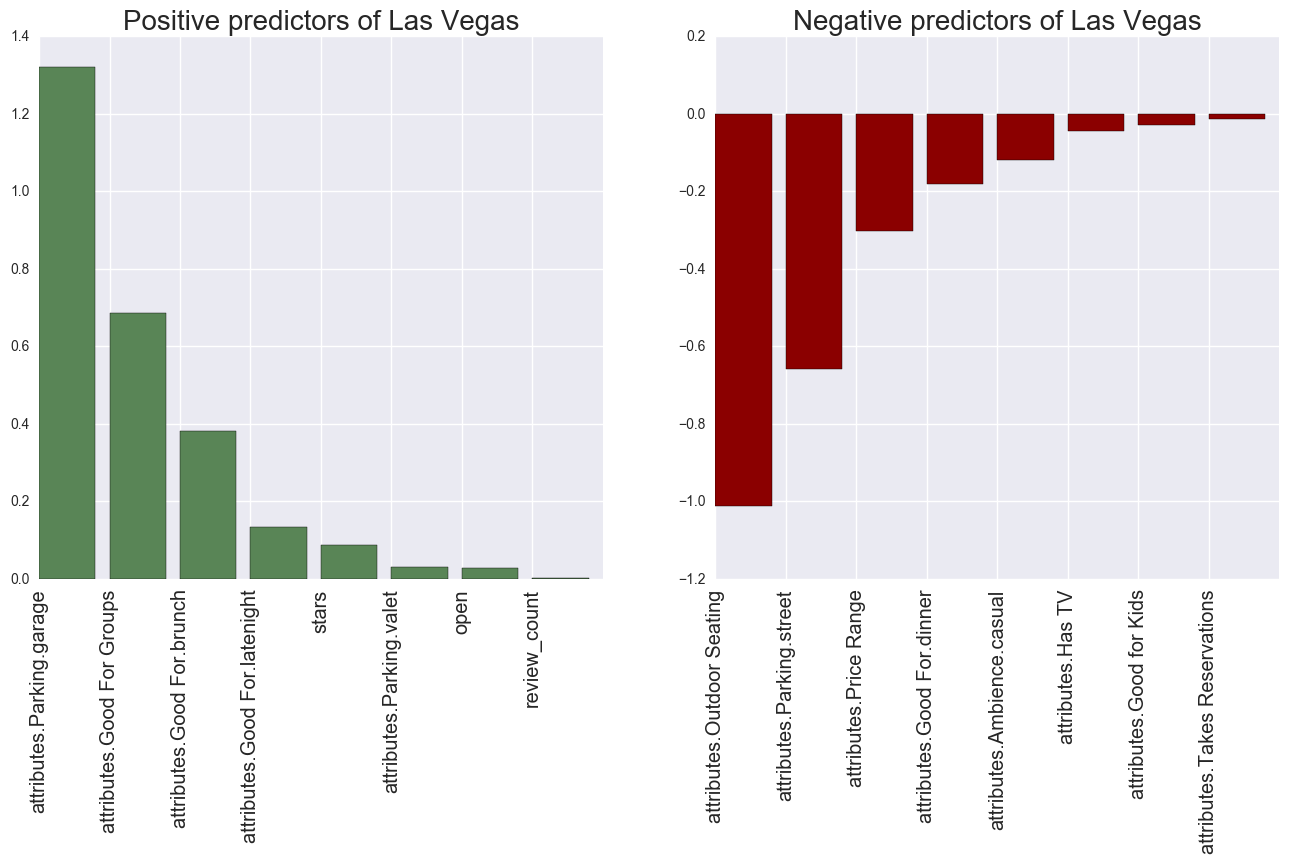

In [151]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))

ax1.bar(range(1, pos_coef_df.shape[0]+1), pos_coef_df.coef, 
       tick_label=pos_coef_df.predictor.values, color = 'darksage')
ax1.set_xticklabels(pos_coef_df.predictor.values, rotation=90, size = 'x-large')
ax1.set_title('Positive predictors of Las Vegas', fontsize = 20)

ax2.bar(range(1, neg_coef_df.shape[0]+1), neg_coef_df.coef, 
       tick_label=neg_coef_df.predictor.values, color = 'darkred')
ax2.set_xticklabels(neg_coef_df.predictor.values, rotation=90, size = 'x-large')
ax2.set_title('Negative predictors of Las Vegas', fontsize = 20)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [152]:
reviews = pd.read_csv('reviews.csv')

In [156]:
service_cols = [col for col in reviews.columns if 'service' in col]
service_cols

['bottle_service',
 'customer_service',
 'food_service',
 'good_service',
 'great_service',
 'service_excellent',
 'service_food',
 'service_friendly',
 'service_good',
 'service_great']

In [169]:
def service_count(review):
    service = 0
    for col in service_cols:
        if reviews.ix[review][col] > 0:
            service += 1
    return service

reviews['service_mentions'] = [service_count(i) for i in range(reviews.shape[0])]




In [170]:
reviews['service_mentions'].value_counts()

0    274325
1     41135
2      6622
3       293
4        21
5         2
Name: service_mentions, dtype: int64

In [171]:
reviews['service_focused'] = reviews['service_mentions'].map(lambda x: 1 if x > 1 else 0)

In [172]:
reviews['stars'] = reviews['stars'].map(lambda x: int(x))

In [173]:
reviews[reviews['service_focused'] == 1].shape

(6938, 111)

In [174]:
reviews[reviews['service_focused'] == 0].shape

(315460, 111)

In [179]:
reviews['rating'] = reviews['stars'].map(lambda x: 1 if x > 2.5 else 0)

In [180]:
reviews['rating'].value_counts()

1    261249
0     61149
Name: rating, dtype: int64

In [184]:
#This is the portion of positive reviews in the service focused group.
np.sum(reviews['rating'][reviews['service_focused'] == 1])/float(len(reviews['rating'][reviews['service_focused'] == 1]))

0.8838281925626982

In [185]:
#This is the portion of positive reviews in the non-service focused group.
np.sum(reviews['rating'][reviews['service_focused'] == 0])/float(len(reviews['rating'][reviews['service_focused'] == 0]))

0.80871425854308

In [178]:
predictors = ['votes_funny', 'votes_cool', 'votes_useful']

X_service = reviews[predictors][reviews['service_focused'] == 1]
y_service = reviews['rating'][reviews['service_focused'] == 1]

X_nonservice = reviews[predictors][reviews['service_focused'] == 0]
y_nonservice = reviews['rating'][reviews['service_focused'] == 0]

In [196]:
params = {
    'penalty':['l1', 'l2'],
    'solver':['liblinear'],
    'C': np.linspace(0.00002,1,100)
}

lr = LogisticRegression()
lr_gs = GridSearchCV(lr, params, cv=3, verbose=0)
gs_service = lr_gs.fit(X_service, y_service)

In [197]:
print "Service Best Params", gs_service.best_params_
print "Service Best Score", gs_service.best_score_

Service Best Params {'penalty': 'l2', 'C': 0.070725656565656561, 'solver': 'liblinear'}
Service Best Score 0.451859325454


In [200]:
lr_final = LogisticRegression(penalty = 'l2', C = 0.0707, solver = 'liblinear')
service_results = lr_final.fit(X_service, y_service)

In [201]:
non_service_results = lr_final.fit(X_nonservice, y_nonservice)

In [202]:
service_coef_df = pd.DataFrame({
        'predictor': predictors,
        'coef': service_results.coef_[0]
    })

nonservice_coef_df = pd.DataFrame({
        'predictor': predictors,
        'coef': non_service_results.coef_[0]
    })

In [203]:
service_coef_df

,coef,predictor
0,0.414374,votes_funny
1,-1.100406,votes_cool
2,0.367228,votes_useful


In [204]:
nonservice_coef_df

,coef,predictor
0,0.414374,votes_funny
1,-1.100406,votes_cool
2,0.367228,votes_useful


In [205]:
#The coefficients I got were exactly the same. 
#I may have made a mistake somewhere.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


In [226]:
users = pd.read_csv('users.csv')

In [227]:
users.head()

,Unnamed: 0,yelping_since,compliments_plain,review_count,compliments_cute,compliments_writer,fans,compliments_note,compliments_hot,compliments_cool,...,compliments_more,elite,name,user_id,votes_cool,compliments_list,votes_funny,compliments_photos,compliments_funny,votes_useful
0,0,2015-01,NaN,1,NaN,NaN,0,NaN,NaN,NaN,...,NaN,[],Scott,dMeSxE7S6Yxhz3cBgd6Sjw,0,NaN,0,NaN,NaN,0
1,1,2015-01,NaN,1,NaN,NaN,0,NaN,NaN,NaN,...,NaN,[],Diego,c-e0BxGy3eNtKzKDrrHyGw,0,NaN,0,NaN,NaN,0
2,2,2015-01,NaN,2,NaN,NaN,0,NaN,NaN,NaN,...,NaN,[],Katie,tO-IKvmHn9kGobTcVweTeA,0,NaN,0,NaN,NaN,0
3,3,2015-01,NaN,9,NaN,NaN,0,NaN,NaN,NaN,...,NaN,[],Ross,soPELsow5JAqNSYCUmntJg,2,NaN,1,NaN,NaN,0
4,4,2015-01,NaN,2,NaN,NaN,0,NaN,NaN,NaN,...,NaN,[],Pam,RR6dZa6dkrcgjKvEnI-Myw,0,NaN,0,NaN,NaN,0


In [228]:
users.columns

Index([u'Unnamed: 0', u'yelping_since', u'compliments_plain', u'review_count',
       u'compliments_cute', u'compliments_writer', u'fans',
       u'compliments_note', u'compliments_hot', u'compliments_cool',
       u'compliments_profile', u'average_stars', u'compliments_more', u'elite',
       u'name', u'user_id', u'votes_cool', u'compliments_list', u'votes_funny',
       u'compliments_photos', u'compliments_funny', u'votes_useful'],
      dtype='object')

In [229]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144206 entries, 0 to 144205
Data columns (total 22 columns):
Unnamed: 0             144206 non-null int64
yelping_since          144206 non-null object
compliments_plain      47034 non-null float64
review_count           144206 non-null int64
compliments_cute       13133 non-null float64
compliments_writer     33222 non-null float64
fans                   144206 non-null int64
compliments_note       39872 non-null float64
compliments_hot        31748 non-null float64
compliments_cool       41069 non-null float64
compliments_profile    12368 non-null float64
average_stars          144206 non-null float64
compliments_more       25066 non-null float64
elite                  144206 non-null object
name                   144206 non-null object
user_id                144206 non-null object
votes_cool             144206 non-null int64
compliments_list       7180 non-null float64
votes_funny            144206 non-null int64
compliments_photos  

In [230]:
users['yelping_since'].unique()

array(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07',
       '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2013-04',
       '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10',
       '2013-11', '2013-12', '2014-01', '2012-07', '2012-08', '2012-09',
       '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03',
       '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03',
       '2012-04', '2012-05', '2012-06', '2011-02', '2011-03', '2011-04',
       '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2010-04',
       '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10',
       '2010-11', '2010-12', '2011-01', '2009-02', '2009-03', '2009-04',
       '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10',
       '2009-11', '2009-12', '2010-01', '2010-02', 

In [231]:
#This is the number of years old the account is. I didn't include months.
users['account_age'] = users['yelping_since'].map(lambda x: 2016 - int(x[:4]))

In [232]:
users['account_age'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 12, 11, 10,  9,  8])

In [233]:
users['elite'].unique()

array(['[]', '[2015]', '[2014, 2015]', '[2014]', '[2013, 2014, 2015]',
       '[2013]', '[2013, 2014]', '[2012, 2013]',
       '[2012, 2013, 2014, 2015]', '[2012, 2013, 2015]',
       '[2012, 2013, 2014]', '[2012]', '[2013, 2015]',
       '[2012, 2014, 2015]', '[2011, 2012]', '[2011, 2012, 2013, 2014]',
       '[2011, 2012, 2013, 2014, 2015]', '[2011]', '[2011, 2012, 2013]',
       '[2011, 2012, 2014, 2015]', '[2011, 2012, 2013, 2015]',
       '[2011, 2012, 2015]', '[2011, 2014, 2015]', '[2012, 2015]',
       '[2011, 2015]', '[2010, 2011, 2012, 2013, 2014, 2015]',
       '[2010, 2011, 2012, 2013, 2014]', '[2010, 2011]', '[2010]',
       '[2010, 2011, 2012, 2013]', '[2010, 2011, 2012]',
       '[2011, 2013, 2014, 2015]', '[2010, 2015]',
       '[2010, 2011, 2012, 2015]', '[2010, 2011, 2015]',
       '[2010, 2014, 2015]', '[2011, 2013]',
       '[2009, 2010, 2011, 2012, 2013, 2014, 2015]', '[2009, 2010]',
       '[2010, 2011, 2013]', '[2009, 2010, 2011]', '[2009, 2010, 2013]',
       '[2

In [234]:
def count_elites(x):
    if x == '[]':
        return 0
    else:
        return len(x.replace('[]','').split(','))

users['elite_count'] = users['elite'].map(count_elites)

In [235]:
users['elite_count'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 11,  8, 10,  9])

In [236]:
users['elite_bool'] = users['elite_count'].map(lambda x: 1 if x > 0  else 0)

In [237]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144206 entries, 0 to 144205
Data columns (total 25 columns):
Unnamed: 0             144206 non-null int64
yelping_since          144206 non-null object
compliments_plain      47034 non-null float64
review_count           144206 non-null int64
compliments_cute       13133 non-null float64
compliments_writer     33222 non-null float64
fans                   144206 non-null int64
compliments_note       39872 non-null float64
compliments_hot        31748 non-null float64
compliments_cool       41069 non-null float64
compliments_profile    12368 non-null float64
average_stars          144206 non-null float64
compliments_more       25066 non-null float64
elite                  144206 non-null object
name                   144206 non-null object
user_id                144206 non-null object
votes_cool             144206 non-null int64
compliments_list       7180 non-null float64
votes_funny            144206 non-null int64
compliments_photos  

In [243]:
cols_to_keep = [col for col in users.columns if np.sum(users[col].isnull()) == 0 ]
cols_to_keep

['Unnamed: 0',
 'yelping_since',
 'review_count',
 'fans',
 'average_stars',
 'elite',
 'name',
 'user_id',
 'votes_cool',
 'votes_funny',
 'votes_useful',
 'account_age',
 'elite_count',
 'elite_bool']

In [253]:
X = users[['review_count', 'fans', 'average_stars', 'votes_cool', 
           'votes_funny', 'votes_useful', 'account_age']]
y = users['elite_bool']

In [254]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)

In [ ]:
params = {
    'penalty':['l1', 'l2'],
    'solver':['liblinear'],
    'C': np.linspace(0.00002,1,100)
}

lr = LogisticRegression()
lr_gs = GridSearchCV(lr, params, cv=3, verbose=1)
gs_results = lr_gs.fit(X, y)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?